In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [1]:
import numpy as np
import scipy.integrate as integrate
from scipy.optimize import fsolve
import scipy
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn import manifold
from sklearn import svm
import scipy.misc

import graphlearning as gl

import matplotlib.pyplot as plt

In [2]:
from sklearn import linear_model as linear
from sklearn import metrics as metrics

In [3]:
from torchvision import datasets, transforms

In [4]:

import classifier

In [5]:
mnist = datasets.MNIST("/home/taanish/MNIST", train=True, download=False)

In [23]:
X = mnist.data.numpy()[:30000,:28,:28]

In [24]:
X = np.reshape(X, (30000, 784))

In [25]:
labels = mnist.targets.numpy()[:30000]

In [26]:
cl = classifier.ClassificationTests(X, labels, 500, 30000)

In [28]:
cl.train(500)

/home/taanish/.conda/envs/manifold-learning/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [29]:
score_ground = cl.ground_accuracy()

In [30]:
print(score_ground)

0.692


In [31]:
%%prun -s cumulative
(score, predict) = cl.OOSE_accuracy()

/home/taanish/trainer_library/manifoldlearning.py:162: UserWarning: Exited at iteration 1000 with accuracies 
[3.57057594e-09 2.11904898e-09 2.75773227e-09 3.84810318e-09
 4.64291373e-09 2.66073623e-09 3.30652289e-09 6.23685612e-09
 4.23050464e-09 4.50135630e-03]
not reaching the requested tolerance 1e-08.
Use iteration 926 instead with accuracy 
0.0002918316332798282.

  l, Vg = scipy.sparse.linalg.lobpcg(A_, X, M=None, tol=1e-8, largest=False,
/home/taanish/trainer_library/manifoldlearning.py:162: UserWarning: Exited postprocessing with accuracies 
[3.57722709e-09 2.12223825e-09 2.75890131e-09 3.85205484e-09
 4.65021076e-09 2.66385736e-09 3.31506762e-09 6.25330238e-09
 4.23666357e-09 2.91828290e-03]
not reaching the requested tolerance 1e-08.
  l, Vg = scipy.sparse.linalg.lobpcg(A_, X, M=None, tol=1e-8, largest=False,
/home/taanish/trainer_library/manifoldlearning.py:177: RuntimeWarning: divide by zero encountered in reciprocal
  d0 = np.array(np.reciprocal(W0.sum(-1))).squeeze()


In [32]:
subplots = np.array([[4,6,1]])

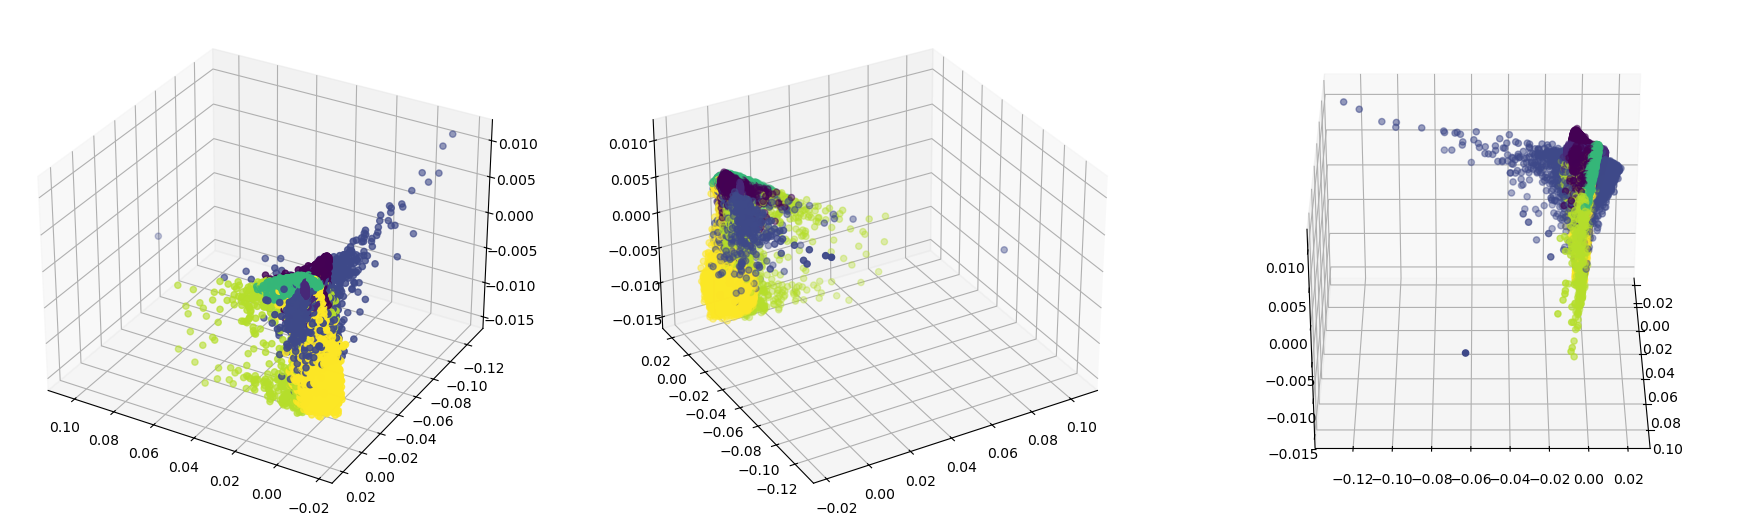

In [33]:
cl.visualize_preds(subplots)

In [34]:
score

0.5224406779661017

In [35]:
predict

array([8, 0, 9, ..., 9, 6, 1])

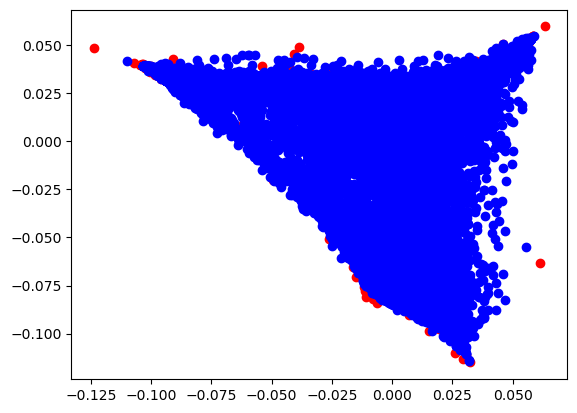

In [36]:
cl.visualize_pts()

In [16]:
#from sklearn.neighbors import kneighbors_graph

In [17]:
#data1 = np.array([[1,2],[3,4],[5,6],[7,8]], np.int32)

In [18]:
#dg1 = kneighbors_graph(data1, n_neighbors=2)

In [19]:
#dg1.toarray()

In [20]:
#data2 = np.array([[7],[9],[6],[12]], np.int32)

In [21]:
#dg2 = kneighbors_graph(data2, n_neighbors=2)

In [22]:
#dg2.toarray()

In [23]:
#print(data1[0])

In [24]:
#print(data1[0].ndim)

In [22]:
import knn

In [25]:
k = knn.KNNTests(X, 10000, 1000)

In [26]:
k.generate_knns()

/home/taanish/trainer_library/manifoldlearning.py:151: UserWarning: Exited at iteration 1000 with accuracies 
[6.46633043e-07 1.52647740e-07 4.03186475e-07 2.06356588e-08
 8.10523705e-08 3.87511166e-07 2.45708768e-07 2.63467763e-07
 1.75674571e-07 9.35788230e-03]
not reaching the requested tolerance 1e-08.
Use iteration 126 instead with accuracy 
1.7351992857799994e-05.

  l, Vg = scipy.sparse.linalg.lobpcg(A_, X, M=None, tol=1e-8, largest=False,
/home/taanish/trainer_library/manifoldlearning.py:151: UserWarning: Exited postprocessing with accuracies 
[7.95480159e-06 2.46891477e-06 5.51318373e-06 2.85582765e-06
 2.81934716e-06 6.98698162e-06 3.89861048e-06 4.23728239e-06
 9.74805928e-06 1.15415246e-04]
not reaching the requested tolerance 1e-08.
  l, Vg = scipy.sparse.linalg.lobpcg(A_, X, M=None, tol=1e-8, largest=False,


In [27]:
overlap = k.knn_overlap()

In [28]:
print(overlap)

0.14504444444444542


In [29]:
import regression

In [34]:
r = regression.RegressionTests(X, labels, 1000, 10000)

In [35]:
r.train()

In [36]:
r.ground_accuracy()

0.37970155920444804

In [37]:
(r_score, r_predict) = r.OOSE_accuracy()

/home/taanish/trainer_library/manifoldlearning.py:151: UserWarning: Exited at iteration 1000 with accuracies 
[2.63511710e-05 9.50477735e-07 7.11734533e-06 7.11974674e-06
 2.52039234e-06 5.70630219e-06 2.71546915e-05 7.88954331e-06
 1.14225746e-05 2.21177539e-03]
not reaching the requested tolerance 1e-08.
Use iteration 113 instead with accuracy 
0.0001375210311802857.

  l, Vg = scipy.sparse.linalg.lobpcg(A_, X, M=None, tol=1e-8, largest=False,
/home/taanish/trainer_library/manifoldlearning.py:151: UserWarning: Exited postprocessing with accuracies 
[2.53329008e-04 2.93721905e-06 6.36122720e-06 2.67681726e-05
 4.97745181e-06 5.89913535e-06 4.99760964e-06 2.06535406e-05
 3.42570006e-04 6.99969090e-04]
not reaching the requested tolerance 1e-08.
  l, Vg = scipy.sparse.linalg.lobpcg(A_, X, M=None, tol=1e-8, largest=False,


In [38]:
r_score

0.38814917553500616